Здравствуйте, не могу понять, как уменьшить метрику, нужен совет, можете помочь?

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>Доброго дня, Андрей!<br>
Не увидел своих прошлых комментариев( Поэтому не знаю на чём мы расстались? Оставлял ли я там какие вопросы? Напиши, пожалуйста. А лучше - встаивть все комментарии назад.<br>
    
А пока пошёл ко второй части)) Сейчас посмотрим вместе что можно сделать.<br>
    
Пришёл с обхода) Постарался наметить пути, по которым стоит двигаться к результату. Посомтри, пожалуйста. А в целом - на вебинаре также подробно всё обговаривали) БУДУ ЖДАТЬ!

# План проекта
1. Загрузка и исследование данных
2. Предобработка данных, разработка модели
3. Отчёт

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u>Лучше подробно его расписывать для встречи. Тут уж совмем кратко) Вот есть такой вариант:

Исследуем проблематику оптимизациии энергопотребления на этапе обработки стали.

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Тут такой момент: дальше идёт решение некой проблематики. Но какой?) Тут лучше оставлять описание самой задачи. Добавь, пожалуйста к следующему разу!.</p>
</div>

Что можно сказать о данных:

Есть пропуски значений в столбцах. Скорее всего просто отсутствует замер. 
В таблицах разное количество данных столбца key. На этапе предобработки надо будет сгрупировать по этому признаку.
Есть несоответсвующий тип данных, столбцы, которые могут не использовать тип float, так как хранят только целые числа.
Выбросы значения реактивной мощности в таблице data_arc. Скорее всего какая-то ошибка.

Данные распределены нормально со смещением влево, данные о температуре распределены нормально без смещения.


<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>
Вывод на месте, это важно. Он, возможно, излишне лаконичный)) Но основные сложности отмечены.<br>
        
Что хотелось бы опросить к следующему разу: по графикам. Они есть, но смотрятся в итоге не аккуратно - наползают подписи, а от сюда вид диплома не очень))) Скорректируй, пожалуйста.<br><br>
        
А данные у нас, всё же, сложно назвать нормальными в массе своей. Рекомендуют вместе смотреть и гистограму и боксплот: один хорошо показывает однородность данных, второй - выбросы. А вместе они сила)) Например так, как ниже. А о нормальности: верно, графический анализ чаще всего достаточен. Но для пущей уверенности можно глянуть тесты на нормальность. Вот здесь можно глянуть:<br>/www.statology.org/normality-test-python/    
</p>
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
ОК, Андрей, с первичным анализом - понятно. Есть и аналитика, и некоторые выводы, и графика - всё как надо на этом этапе). (за исключением того, что написал выше про аккуратность графиков, план, описание проекта и нормальность)<br><br>
<br>
С дополнительными ворпосами - не увидел.<br>
Но на встрече обсудили многие. Можно глянуть вебинар будет если что.<br> 
Если возникнут другие - обязательно пиши!!! Да и всегда в чате сможем встретиться. Ну или напиши со следующей итреацией. Постараюсь ответить быстро!<br>
Что ж, тогда вперёд к моделированию)<br>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_arc = pd.read_csv('/datasets/data_arc_new.csv') # данные об электродах;
data_bulk = pd.read_csv('/datasets/data_bulk_new.csv') # данные о подаче сыпучих материалов (объём);
data_bulk_time = pd.read_csv('/datasets/data_bulk_time_new.csv') # данные о подаче сыпучих материалов (время);
data_gas = pd.read_csv('/datasets/data_gas_new.csv') # данные о продувке сплава газом;
data_temp = pd.read_csv('/datasets/data_temp_new.csv') # результаты измерения температуры;
data_wire = pd.read_csv('/datasets/data_wire_new.csv') # данные о проволочных материалах (объём);
data_wire_time = pd.read_csv('/datasets/data_wire_time_new.csv') # данные о проволочных материалах (время).

In [3]:
print('data_arc:')
display(data_arc.info())
print('data_bulk:')
display(data_bulk.info())
print('data_gas:')
display(data_gas.info())
print('data_temp:')
display(data_temp.info())
print('data_wire:')
display(data_wire.info())

data_arc:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

data_bulk:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

data_gas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

data_temp:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


None

data_wire:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

In [4]:
print('data_arc:')
display(data_arc.describe())
print('data_bulk:')
display(data_bulk.describe())
print('data_gas:')
display(data_gas.describe())
print('data_temp:')
display(data_temp.describe())
print('data_wire:')
display(data_wire.discribe())

data_arc:


,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


data_bulk:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


data_gas:


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


data_temp:


,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


data_wire:


AttributeError: 'DataFrame' object has no attribute 'discribe'

# 2. Предобработка данных, разработка модели

In [5]:
# Посмотрим аномалии в data_arc
data_arc[data_arc['Реактивная мощность'] < 0]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924


In [6]:
# заменим аномальное значение на среднее
data_arc.at[9780, 'Реактивная мощность'] = data_arc['Реактивная мощность'].median()

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>Как вариант, можно. Лучше тогда медиану по той партии, в которой пропуск.

In [7]:
# Избавимся от пропусков в целевой
data_temp = data_temp.dropna()

In [8]:
# удалим столбцы с малым колличеством измерений
data_wire = data_wire.drop(['Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9'], axis=1)
data_bulk = data_bulk.drop(['Bulk 1', 'Bulk 2', 'Bulk 5', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 13'], axis=1)

In [9]:
# Заполним пропуски
data_bulk = data_bulk.fillna(0)
data_wire = data_wire.fillna(0)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>заменяем на 0 - ОК. 

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА </b></u></p>    <p>В целом - ОК. НО есть такой момент: у нас ковши наблюдаются, в которых Есть первая температура. А объект моделирования у нас - ковш. И если нет целевой - надо удалять весь ковш. Сейчас они всё ещё в деле))). Наприм ковш номер 3000 - целевой нет. Значить надо удалить. А он всё равно в таблице остался. Посмотри, пожалуйста.</p>
</div>

Удалим из таблицы партии key, которые не подходят по следующим условиям:

    1. Нет финального замера. Когда температуру замеряли до окончания последней операции нагрева дугой
    2. Только один замер температуры.

In [10]:
bad_keys = []
for key in list(data_temp['key'].unique()):
    try:
        if ((data_temp[data_temp['key'] == key]['Время замера'].max() < 
            data_arc[data_arc['key'] == key]['Конец нагрева дугой'].max()) or
           (data_temp[data_temp['key'] == key]['Время замера'].max() == 
            data_temp[data_temp['key'] == key]['Время замера'].min())):
            bad_keys.append(key)
    except:
        bad_keys.append(key)
print(bad_keys, len(bad_keys))

[195, 279, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664,

In [11]:
data_temp = data_temp.query('key not in @bad_keys')
data_temp = data_temp.dropna()
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13924 entries, 0 to 13925
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           13924 non-null  int64  
 1   Время замера  13924 non-null  object 
 2   Температура   13924 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 435.1+ KB


In [12]:
data_temp['Время замера'] = pd.to_datetime(data_temp['Время замера'], format='%Y-%m-%d %H:%M:%S')

# создаём сводную таблицу с первым измерением, для дальнейшего исследования
df_temp_last = data_temp.groupby('key').agg('max')['Время замера']
df_temp_last = pd.DataFrame(df_temp_last)
df_temp_last = df_temp_last.merge(data_temp, on='Время замера', how='left')
df_temp_last.set_axis(['time_last','key','temp_last'], axis = 'columns', inplace = True)

# создаём сводную таблицу с последним измерением, целевой метрикой 
df_temp_first = data_temp.groupby('key').agg('min')['Время замера']
df_temp_first = pd.DataFrame(df_temp_first)
df_temp_first = df_temp_first.merge(data_temp, on='Время замера', how='left')
df_temp_first.set_axis(['time_first','key','temp_first'], axis = 'columns', inplace = True)

# объединяем таблицы
df = df_temp_first.merge(df_temp_last, on='key', how='left')\
                  .reindex(columns=['key', 'time_first', 'temp_first', 'time_last', 'temp_last'])

# сохраним список с пустыми значениями целевой метрики
keys_with_na = list(df[df['temp_last'].isna()]['key'])
keys_not_na = list(df[~df['temp_last'].isna()]['key'])

# посмотрим таблицу
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2474
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   key         2475 non-null   int64         
 1   time_first  2475 non-null   datetime64[ns]
 2   temp_first  2475 non-null   float64       
 3   time_last   2475 non-null   datetime64[ns]
 4   temp_last   2475 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 116.0 KB


In [13]:
df = df[~df['key'].isin(keys_with_na)]

In [14]:
df[df['temp_last'] == 0].sum()

key           0.0
temp_first    0.0
temp_last     0.0
dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2474
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   key         2475 non-null   int64         
 1   time_first  2475 non-null   datetime64[ns]
 2   temp_first  2475 non-null   float64       
 3   time_last   2475 non-null   datetime64[ns]
 4   temp_last   2475 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 116.0 KB


In [16]:
# Переведем в правильный формат
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'], format='%Y-%m-%d %H:%M:%S')

In [17]:
# Добавим суммарное временя нагрева
data_arc['duration_heating'] = (data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']) / np.timedelta64(1, 'm')

In [18]:
data_arc = data_arc[['key', 'Активная мощность','Реактивная мощность', 'duration_heating']].groupby('key').sum()

In [19]:
df = pd.merge(df, data_gas, how="inner", on=["key"])
df = pd.merge(df, data_wire, how="inner", on=["key"])
df = pd.merge(df, data_bulk, how="inner", on=["key"])
df = pd.merge(df, data_arc, how="inner", on=["key"]) 
df = df.set_index('key')
display(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 1 to 2499
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time_first           2329 non-null   datetime64[ns]
 1   temp_first           2329 non-null   float64       
 2   time_last            2329 non-null   datetime64[ns]
 3   temp_last            2329 non-null   float64       
 4   Газ 1                2329 non-null   float64       
 5   Wire 1               2329 non-null   float64       
 6   Wire 2               2329 non-null   float64       
 7   Bulk 3               2329 non-null   float64       
 8   Bulk 4               2329 non-null   float64       
 9   Bulk 6               2329 non-null   float64       
 10  Bulk 12              2329 non-null   float64       
 11  Bulk 14              2329 non-null   float64       
 12  Bulk 15              2329 non-null   float64       
 13  Активная мощность    2329 non-nul

None

,time_first,temp_first,time_last,temp_last,Газ 1,Wire 1,Wire 2,Bulk 3,Bulk 4,Bulk 6,Bulk 12,Bulk 14,Bulk 15,Активная мощность,Реактивная мощность,duration_heating
key,,,,,,,,,,,,,,,,
1,2019-05-03 11:02:04,1571.0,2019-05-03 11:30:38,1613.0,29.749986,60.059998,0.00000,0.0,43.0,0.0,206.0,150.0,154.0,3.036730,2.142821,18.300000
2,2019-05-03 11:34:04,1581.0,2019-05-03 11:55:09,1602.0,12.555561,96.052315,0.00000,0.0,73.0,0.0,206.0,149.0,154.0,2.139408,1.453357,13.516667
3,2019-05-03 12:06:44,1596.0,2019-05-03 12:35:57,1599.0,28.554793,91.160157,0.00000,0.0,34.0,0.0,205.0,152.0,153.0,4.063641,2.937457,10.916667
4,2019-05-03 12:39:27,1601.0,2019-05-03 12:59:47,1625.0,18.841219,89.063515,0.00000,0.0,81.0,0.0,207.0,153.0,154.0,2.706489,2.056992,12.350000
5,2019-05-03 13:11:03,1576.0,2019-05-03 13:36:39,1602.0,5.413692,89.238236,9.11456,0.0,78.0,0.0,203.0,151.0,152.0,2.252950,1.687991,14.483333


In [20]:
# Удалим данные с начальной температурой ниже 1400 градусов.
df = df[df['temp_first'] > 1400]

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА </b></u></p>У нас в итоге должно быть не более строк, чем ковшей. Т.е. не более 3000 точно! Перед мержеванием - нам надо агрегировать мощность сначала. Тут у тебя 14000 строк.... что-то не так) Посомтри, пожалуйста.

In [21]:
#df = df.fillna(0)
#df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 1 to 2499
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time_first           2325 non-null   datetime64[ns]
 1   temp_first           2325 non-null   float64       
 2   time_last            2325 non-null   datetime64[ns]
 3   temp_last            2325 non-null   float64       
 4   Газ 1                2325 non-null   float64       
 5   Wire 1               2325 non-null   float64       
 6   Wire 2               2325 non-null   float64       
 7   Bulk 3               2325 non-null   float64       
 8   Bulk 4               2325 non-null   float64       
 9   Bulk 6               2325 non-null   float64       
 10  Bulk 12              2325 non-null   float64       
 11  Bulk 14              2325 non-null   float64       
 12  Bulk 15              2325 non-null   float64       
 13  Активная мощность    2325 non-nul

In [22]:
# Добавим полную мощность
df['full_power'] = (df['Активная мощность']**2 + df['Реактивная мощность']**2)**0.5

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p> нет, не совсем так. Ниже формула.

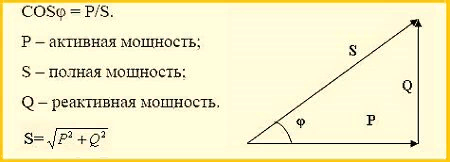

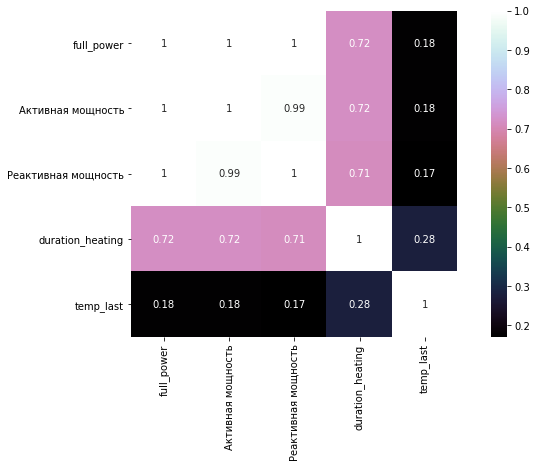

In [23]:
corr_mat=df[[
    'full_power',
    'Активная мощность',
    'Реактивная мощность',
    'duration_heating',
    'temp_last']].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix');

In [24]:
# удалим мультиколениарные с полной мощностью признаки
df = df.drop(['Реактивная мощность'], axis=1)
df = df.drop(['Активная мощность'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 1 to 2499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time_first        2325 non-null   datetime64[ns]
 1   temp_first        2325 non-null   float64       
 2   time_last         2325 non-null   datetime64[ns]
 3   temp_last         2325 non-null   float64       
 4   Газ 1             2325 non-null   float64       
 5   Wire 1            2325 non-null   float64       
 6   Wire 2            2325 non-null   float64       
 7   Bulk 3            2325 non-null   float64       
 8   Bulk 4            2325 non-null   float64       
 9   Bulk 6            2325 non-null   float64       
 10  Bulk 12           2325 non-null   float64       
 11  Bulk 14           2325 non-null   float64       
 12  Bulk 15           2325 non-null   float64       
 13  duration_heating  2325 non-null   float64       
 14  full_power        2325 n

In [25]:
df

,time_first,temp_first,time_last,temp_last,Газ 1,Wire 1,Wire 2,Bulk 3,Bulk 4,Bulk 6,Bulk 12,Bulk 14,Bulk 15,duration_heating,full_power
key,,,,,,,,,,,,,,,
1,2019-05-03 11:02:04,1571.0,2019-05-03 11:30:38,1613.0,29.749986,60.059998,0.00000,0.0,43.0,0.0,206.0,150.0,154.0,18.300000,3.716640
2,2019-05-03 11:34:04,1581.0,2019-05-03 11:55:09,1602.0,12.555561,96.052315,0.00000,0.0,73.0,0.0,206.0,149.0,154.0,13.516667,2.586371
3,2019-05-03 12:06:44,1596.0,2019-05-03 12:35:57,1599.0,28.554793,91.160157,0.00000,0.0,34.0,0.0,205.0,152.0,153.0,10.916667,5.014163
4,2019-05-03 12:39:27,1601.0,2019-05-03 12:59:47,1625.0,18.841219,89.063515,0.00000,0.0,81.0,0.0,207.0,153.0,154.0,12.350000,3.399456
5,2019-05-03 13:11:03,1576.0,2019-05-03 13:36:39,1602.0,5.413692,89.238236,9.11456,0.0,78.0,0.0,203.0,151.0,152.0,14.483333,2.815155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2019-08-10 11:27:47,1570.0,2019-08-10 11:50:47,1591.0,7.125735,89.150879,0.00000,21.0,0.0,0.0,256.0,129.0,223.0,12.050000,3.863328
2496,2019-08-10 11:56:48,1554.0,2019-08-10 12:25:13,1591.0,9.412616,114.179527,0.00000,0.0,63.0,0.0,256.0,129.0,226.0,15.666667,5.067396
2497,2019-08-10 12:37:26,1571.0,2019-08-10 12:53:28,1589.0,6.271699,94.086723,9.04800,0.0,85.0,0.0,230.0,124.0,226.0,9.483333,4.360104


<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА 4</b></u></p>
    <p>У нас ковши наблюдаются, в которых нет целвой, но есть первая температура. А объект моделирования у нас - ковш. И если нет целевой - надо удалять весь ковш. Сейчас они всё ещё в деле))). Наприм ковш номер 3000 - целевой нет. Значить надо удалить. А он всё равно в таблице остался. Посмотри, пожалуйста.</p>
</div>

In [26]:
# Разделим данные на обучающую и тестовую выборки
features = df.drop(['temp_last', 'time_first', 'time_last'] , axis=1)
target = df['temp_last']

features_train, features_test, target_train, target_test = \
    train_test_split(features, target, test_size=0.25, random_state=250923)

In [27]:
features

,temp_first,Газ 1,Wire 1,Wire 2,Bulk 3,Bulk 4,Bulk 6,Bulk 12,Bulk 14,Bulk 15,duration_heating,full_power
key,,,,,,,,,,,,
1,1571.0,29.749986,60.059998,0.00000,0.0,43.0,0.0,206.0,150.0,154.0,18.300000,3.716640
2,1581.0,12.555561,96.052315,0.00000,0.0,73.0,0.0,206.0,149.0,154.0,13.516667,2.586371
3,1596.0,28.554793,91.160157,0.00000,0.0,34.0,0.0,205.0,152.0,153.0,10.916667,5.014163
4,1601.0,18.841219,89.063515,0.00000,0.0,81.0,0.0,207.0,153.0,154.0,12.350000,3.399456
5,1576.0,5.413692,89.238236,9.11456,0.0,78.0,0.0,203.0,151.0,152.0,14.483333,2.815155
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1570.0,7.125735,89.150879,0.00000,21.0,0.0,0.0,256.0,129.0,223.0,12.050000,3.863328
2496,1554.0,9.412616,114.179527,0.00000,0.0,63.0,0.0,256.0,129.0,226.0,15.666667,5.067396
2497,1571.0,6.271699,94.086723,9.04800,0.0,85.0,0.0,230.0,124.0,226.0,9.483333,4.360104


In [28]:
features_train

,temp_first,Газ 1,Wire 1,Wire 2,Bulk 3,Bulk 4,Bulk 6,Bulk 12,Bulk 14,Bulk 15,duration_heating,full_power
key,,,,,,,,,,,,
1026,1573.0,8.910542,65.051994,0.000000,104.0,0.0,105.0,257.0,153.0,0.0,13.816667,2.884506
1442,1600.0,9.069192,155.282409,0.000000,129.0,0.0,0.0,107.0,129.0,73.0,7.800000,3.003962
2170,1545.0,11.966259,95.222397,0.000000,0.0,102.0,0.0,422.0,210.0,215.0,19.433333,4.790603
976,1578.0,10.491841,85.082398,171.550073,251.0,0.0,0.0,0.0,190.0,0.0,8.616667,3.793344
888,1581.0,7.954749,117.280793,0.000000,188.0,0.0,0.0,309.0,197.0,167.0,10.083333,2.172344
...,...,...,...,...,...,...,...,...,...,...,...,...
1414,1551.0,8.495829,60.137996,0.000000,72.0,0.0,0.0,256.0,151.0,205.0,11.966667,2.522838
870,1591.0,12.758931,230.443191,56.519836,42.0,0.0,0.0,206.0,104.0,203.0,11.466667,3.833893
1017,1552.0,8.423716,96.173996,0.000000,0.0,239.0,0.0,206.0,102.0,103.0,17.216667,2.853522


In [29]:
# scaler = StandardScaler()
# features_train = scaler.fit_transform(features_train)
# features_test = scaler.transform(features_test)

Обучение моделей:

In [30]:
regressor = LinearRegression()
cv_MAE_LR = (cross_val_score(regressor, 
                             features_train, 
                             target_train, 
                             cv=6, 
                             scoring='neg_mean_absolute_error').mean() * -1)
print('Mean MAE from CV of LinearRegression =', cv_MAE_LR)

Mean MAE from CV of LinearRegression = 6.7108174785394175


MAE = 6.7108174785394175

In [31]:
regressor = CatBoostRegressor(verbose=False, random_state=250923)
cv_MAE_CBR = (cross_val_score(regressor, 
                             features_train, 
                             target_train, 
                             cv=6, 
                             scoring='neg_mean_absolute_error').mean() * -1)
print('Mean MAE from CV of CatBoostRegressor =', cv_MAE_CBR)

Mean MAE from CV of CatBoostRegressor = 6.736651877520281


Получилось достичь метрики 6.736651877520281, удовлетворяющей условиям заказчика.

те же 6.7 MAE кросс-валидации лучшей модели

In [ ]:
regressor = RandomForestRegressor(random_state=250923) 
hyperparams = [{'criterion':['mse'],
                'n_estimators':[x for x in range(100, 1001, 50)]}]

clf = GridSearchCV(regressor, hyperparams, scoring='neg_mean_absolute_error', cv=6)
clf.fit(features_train, target_train)
print("Best parameters set found on development set:")
print()
best_params_RFR = clf.best_params_
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% ((mean*-1), params))
print()

cv_MAE_RFR = (max(means)*-1)

## Тестирование лучшей модели

Протестируем нашу CatBoost модель:

In [32]:
best_params_CBR = CatBoostRegressor(verbose=False, 
                                    random_state=250923).fit(features_train, 
                                        target_train).get_all_params()

In [33]:
best_params_CBR

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 250923,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.04470000043511391,
 'score_function': 'Cosine',
 'task_

In [34]:
features_test

,temp_first,Газ 1,Wire 1,Wire 2,Bulk 3,Bulk 4,Bulk 6,Bulk 12,Bulk 14,Bulk 15,duration_heating,full_power
key,,,,,,,,,,,,
1788,1591.0,10.442265,186.217193,11.068720,0.0,68.0,0.0,511.0,203.0,209.0,24.183333,4.427279
2226,1571.0,3.725078,48.091678,0.000000,38.0,21.0,0.0,180.0,129.0,156.0,15.366667,3.916160
276,1620.0,12.728707,118.198082,82.205765,74.0,0.0,0.0,255.0,134.0,203.0,9.950000,4.820882
155,1568.0,5.468144,93.125763,0.000000,0.0,0.0,0.0,106.0,100.0,203.0,12.016667,4.152894
706,1600.0,14.748546,75.113998,0.000000,0.0,0.0,165.0,208.0,104.0,110.0,13.033333,3.931123
...,...,...,...,...,...,...,...,...,...,...,...,...
2286,1554.0,24.040159,149.210877,0.000000,0.0,80.0,25.0,107.0,150.0,56.0,15.616667,4.791001
1367,1560.0,1.801414,105.066002,0.000000,64.0,0.0,83.0,512.0,222.0,0.0,13.183333,2.505646
2402,1590.0,11.418124,142.222077,11.159200,0.0,111.0,0.0,157.0,136.0,104.0,12.350000,5.146128


In [35]:
model = CatBoostRegressor(verbose=False)
model.set_params(**best_params_CBR)
model.fit(features_train, target_train)
target_predict = model.predict(features_test)
test_MAE_CBR = mean_absolute_error(target_predict, target_test)
print('MAE on test of CatBoostRegressor =', test_MAE_CBR)

MAE on test of CatBoostRegressor = 5.706091124647126


Отлично! МАЕ на тесте - 5.710792592953412

In [36]:
# Посмотрим как каждый параметр влияет на целевой признак
feature_importance_df = pd.DataFrame(model.feature_importances_, index=features.columns)
feature_importance_df.sort_values(0)

,0
Bulk 3,3.003932
Bulk 4,3.396465
Wire 2,4.491139
Bulk 15,4.829042
Bulk 6,5.190837
Bulk 12,6.654320
full_power,6.811636
Bulk 14,6.940793
Газ 1,6.962969
Wire 1,10.874352


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 5</b></u></p>
Доброго дня, Андрей, теперь точно можно сказать, что пройден весь алгоритм моделирования от анализа исходной инфо до анализа важности факторов.<br>Увидел твои комментари/коорректировки. ОК.<br>
 
Единственное: Не могу не спросить - почему выбран кэтбуст? ведь таже линейная регрссия показывает на трайне лучшее значение?Т.е. переход от раздела обучения к разделу тестирования не понятен). Проект по любому приму100%, просто хотел спросить этот момент.

Просто пока исправлял ошибки, чаще смотрел на кэтбуст, другие модели либо выдавали ошибки, либо зависали на 5-8 минут, кэтбуст же работал всегда и показывал лучший результат. Линейная регрессия всегда была хуже, поэтому не заметил, что она в итоге показала немного лучше результат.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 6</b></u></p>
Доброго дня, Андрей. ОК, понял, спасибо за пояснения.<br>
 
Ещё всегда стараюсь на этом проекте сказать всем вот ещё что: цель заказчика - экономия энергоресурсов.<br>
И в этом проекте искали как раз способ точно предсказывать температуру. И круто использовали для этого весь арсенал<br>
А если рассудать с позиции такой: а что нужно сделать, чтобы снизить энергопотребление?<br>
Судя по модели, самым важным фактором является первая температура. Это значит, что управляя ею, мы сможем управлять энергозатратами. Вывод понятен. Теперь надо разработать мероприятия для этого решения. И тут вопрос возникает скм собой: а это так точно? мы можем управлять первой температурой? В общем, наша модель - только начало работы над энергоэффективностью.<br>
    
Так же есть ещё одна идея, которую хотел предложить тебе на обсуждение.<br>
Возможно, покажется интересным<br><br> 

Дело касается принципиально иного подхода к поиску решения для снижения энергопотребления на производстве<br>
Смотри, Создание данной модели (таково было задание) двигалось по пути "угадывания" температуры<br>
Но мы же знаем жизнь)) лёгкие колебания температур (как и нашего настроения, нашего веса.....)<br>
есть всегда. Более того - будут вегда! И нам что, стараться угадывать их?<br>
Не угонимся, "пупок" развяжется))))) <br>
Предложу для подобных проектов подумать вот в какую сторону<br>
    
Итак, разброс в измерениях - есть, был и будет!! (т.к. этому благоприятствует разнообразие факторов самого проиозводства)<br>
    Тогда задачу можно поставить так: <u>надо уменьшить разброс в измерениях</u>. В данном случае в температуре.<br>
Один из подходов такой: Наверняка есть границы, в пределах которых колебания температур - дело нормальное.<br>
А что, если фикировать случаи, когда температура выходит за эти границы?<br>
Скажем, как "1". И тогда для таких моментов времени собирать инфо по производству: <br>
а что был за материал (химия материала), что был за газ (химический состав газа), какая бригада работала, <br>
что там было с электродами, ограничения только в фантазиях ну и в знаниях самого производства..... <br>
И вот тут можем реально находить причины (через корреляции, проверки гипотез, разные модельки...), фиксировать эти причины. <br>
Ну и разрабатывать энергосберегательные мероприятия.<br><br>
 
Это было отступление)<br>    
Тогда впереди только отчёт. Что для него важно - оставлял в презентации. <br>
БУДУ ЖДАТЬ! <br>

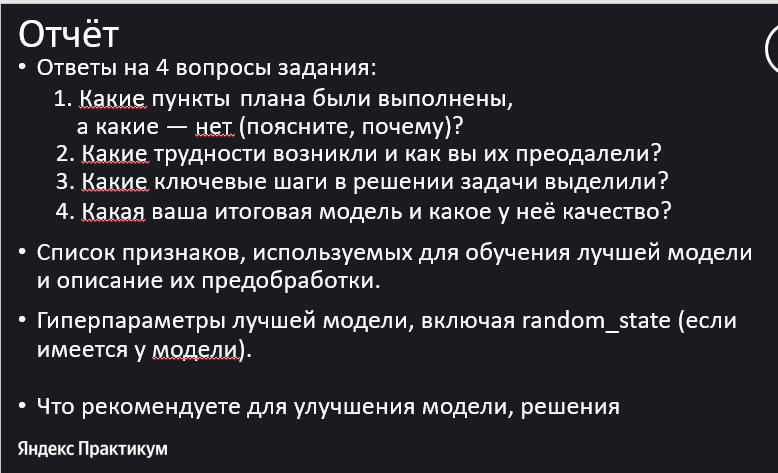

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Матрица корреляций зависимости фичей')

sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

plt.show()

In [ ]:
df['temp_last'].isna().sum()

In [ ]:
df[df['temp_last'] == 0]

Не понимаю, я же в самом начале дропнул ковши, где нету целевой

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА 4</b></u></p>
Там удалены строки с пропусками, не ковши) написал ещё раз выше. Посмотри, пожалуйста. Плюс код выше - не проходит(((.</p>
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
Доброе утро, Андрей!.<br>
Увидел важные изменения. ОК. Но остались ещё важные моментв!!<br>
1) у нас ковши наблюдаются, в которых Есть первая температура. А объект моделирования у нас - ковш. И если нет целевой - надо удалять весь ковш. Сейчас они всё ещё в деле))). Наприм ковш номер 3000 - целевой нет. Значить надо удалить. А он всё равно в таблице остался. Посмотри, пожалуйста<br>
2) ты применяешь left, но потом удаляешь пучтые строки, ОК. А если сделать иннер, то срузу будет всё ОК. Но это не критично.<br>
3) Время, т.е. time_first	time_last - точно не нужны в модели. На встрече говорили об этом)<br>
4) При моделировании существует проблематика мультиколлинеарности.(когда количественные факторы модели имеют сильную корреляцию друг с другом - больше 0.9).Есть ли она у нас?  Если есть - надо  решать по понятиям:) (удалить лишнее)<br><br>

5) Попробуй с помощью команды feature_importances_ выводить график важности факторов. Отличная вещь будет: высока яметрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала.
Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: так мол и так - на эти факторы надо обращать внимание, а эти не влияют.<br>
<br>
БУДУ ЖДАТЬ!

# 3. Отчёт

1. Какие пункты плана были выполнены, а какие — нет (поясните почему)?

Подготовка данных, первичный анализ, изменение типа данных, удаление аномалий и заполнение пропусков. Составление единного датасета. Протестированы модели и результат одной из лучших моделей подтвержден на тестовой выборке. 

2. Какие трудности возникли и как вы их преодолели?

Основная трудность - выбросы и малое количество наблюдений. недостаточность параметров: при таком малом количестве наблюдений стоит запрасить у заказчика дополнительные данные, чтобы еще лучше предсказывать метрику.

3. Какие ключевые шаги в решении задачи выделили?

Ключевые шаги: предобработка данных, сбор всех данных воедино, расчет новых параметров, и выделение итоговой модели.

4. Какая ваша итоговая модель и какое у неё качество?

Итоговая модель - CatBoost с параметрами:\
{'nan_mode': 'Min',\
 'eval_metric': 'RMSE',\
 'iterations': 1000,\
 'sampling_frequency': 'PerTree',\
 'leaf_estimation_method': 'Newton',\
 'grow_policy': 'SymmetricTree',\
 'penalties_coefficient': 1,\
 'boosting_type': 'Plain',\
 'model_shrink_mode': 'Constant',\
 'feature_border_type': 'GreedyLogSum',\
 'bayesian_matrix_reg': 0.10000000149011612,\
 'force_unit_auto_pair_weights': False,\
 'l2_leaf_reg': 3,\
 'random_strength': 1,\
 'rsm': 1,\
 'boost_from_average': True,\
 'model_size_reg': 0.5,\
 'pool_metainfo_options': {'tags': {}},\
 'subsample': 0.800000011920929,\
 'use_best_model': False,\
 'random_seed': 250923,\
 'depth': 6,\
 'posterior_sampling': False,\
 'border_count': 254,\
 'classes_count': 0,\
 'auto_class_weights': 'None',\
 'sparse_features_conflict_fraction': 0,\
 'leaf_estimation_backtracking': 'AnyImprovement',\
 'best_model_min_trees': 1,\
 'model_shrink_rate': 0,\
 'min_data_in_leaf': 1,\
 'loss_function': 'RMSE',\
 'learning_rate': 0.04470000043511391,\
 'score_function': 'Cosine',\
 'task_type': 'CPU',\
 'leaf_estimation_iterations': 1,\
 'bootstrap_type': 'MVS',\
 'max_leaves': 64}

Итоговая метрика модели MAE: 5.706091124647126.


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 7-</b></u></p>
Доброго дня, Андрей!<br>С отчётом - излишне лаконично, но чётко по плану)) Спасибо за открытость суждений!<br>
    
Поздравляю с получением диплома о новой специальности!!!!<br>    
    
Добавлю вот что ещё: изучение бизнес-процессов заказчика - очень важный этап, который может вызывать сложности. Но без этого в нашей работа не обойтись. Можно сказать - вскрывать особенности процессов заказчика - часть нашей работы. Ведь замоделировать можно только то, что понимаешь). Также, хотел бы отметить твою графическую работу. Она  подкрепляла аналитику. На защите заказчику - хорошая графика - может прибавить дополнительной лояльности. Поэтому, стоит её улублять и дальше. <br>
Если говорить о кодовой части, то тут можно прибавить в написании функций для моделирования, паплайн, классы... Но тут  вообще тяжело дойти до предела совершенства - постоянно всегда новое создаётся:).<br>
Также замечу, что тебе удалось быстро вникнуть в суть задачи. А это не проcто - понять новую бизнес-задачу. Здорово, что есть такой важный скил.<br>
    
Далее скажу, что стараюсь говорить всем на финале.<br>
Пройден большой путь. Со своими коcогорами и равнинами, медианами и дисперсиями)<br>
Умение аналитически мыслить, писать красивый код, эффективно автоматизировать расчёты, видеть задачи бизнеса через призму моделирования - вот то основное, что  останется у тебя важного после нашей школы. А дальше - только взращивать посеянные зёрна и укреплять свои скилы.<br><br>
Если говорить о развитии дополнительных компетенций, рекомендовал бы ещё глянуть такие области знаний:<br>
1) Организация проектов по проведению моделирования (например Методология CRISP-DM (Cross-Industry Standard Process)<br>
2) Умения системно подходить к решению аналитической задачи. (например методология ТРИЗ, системный анализ)<br>
3) Если в промышленности будут проекты, то рекоммендовал бы освоить  "Статистичекий контроль качества (SPC)"<br>
4) Ещё важный навык: перевод результататов моделирования на язык бизнеса. Т.е. понимание, как целевые показатели моделей влияют на финансовую выгоду заказчика.<br>

Каждого из нас (и меня в том числе) можно оценивать с нескольких сторон, как специалиста.<br>
1) Умение анализировать, "вгрызание" в данные, в задачу.<br>
2) Знание мат.части: методы, подходы к решению - всё, что по программе заложено<br>
3) Кодовая часть: умение писать эффективный код.<br>
4) Работа с графикой. (умение хорошо ыизуализировать)<br>
И при рабочей деятельности (устраивание на работу/ улучшение карьеры) на важно понимать свои слабые/сильные стороны по этим направлениям. И опираться на них при ведении переговоров и выстраивании дальнейшего совершенствования.<br><br>    
    
Спасибо за этот труд.<br>
Искренне желаю покорить ещё не один аналитический Эверест)<br>  